In [11]:
import flowermd
import hoomd
import gsd
import matplotlib.pyplot as plt
import numpy as np
import freud

In [12]:
traj = gsd.hoomd.open('given-pps-cg.gsd')

In [13]:
def nop(frame):
    positions = frame.particles.position
    molecule_ids = frame.bonds.group
    temp = positions[0]
    vectors = []
    for i, pos in enumerate(positions):
            if i < len(molecule_ids):
                vectors.append(np.stack(pos) - np.stack(temp))
                temp = pos
    vectors = np.array(vectors[1:])
    return vectors

In [14]:
nematic = freud.order.Nematic()
import time
start = time.process_time()
orders = []
frames = []
count = 0
for frame in traj:
    count += 1
    frames.append(count)
    nematic.compute(nop(frame))
    orders.append(nematic.order)
    print("Nematic Order Parameter:", nematic.order)
print("Time taken:", time.process_time() - start, "s")

Nematic Order Parameter: 0.08366385102272034
Nematic Order Parameter: 0.08125421404838562
Nematic Order Parameter: 0.08344501256942749
Nematic Order Parameter: 0.07996777445077896
Nematic Order Parameter: 0.07861024141311646
Nematic Order Parameter: 0.07698450982570648
Nematic Order Parameter: 0.07232197374105453
Nematic Order Parameter: 0.07394228875637054
Nematic Order Parameter: 0.07208935171365738
Nematic Order Parameter: 0.06853333860635757
Nematic Order Parameter: 0.06938223540782928
Nematic Order Parameter: 0.06591774523258209
Nematic Order Parameter: 0.06163978576660156
Nematic Order Parameter: 0.06113792955875397
Nematic Order Parameter: 0.06189384683966637
Nematic Order Parameter: 0.05890277028083801
Nematic Order Parameter: 0.05628732964396477
Nematic Order Parameter: 0.05582909286022186
Nematic Order Parameter: 0.05761822685599327
Nematic Order Parameter: 0.057933587580919266
Nematic Order Parameter: 0.06021534651517868
Nematic Order Parameter: 0.05508735775947571
Nematic O

In [9]:
import gsd.hoomd
import freud
import numpy as np
import time

# Open the trajectory file
traj = gsd.hoomd.open('given-pps-cg.gsd')

# Initialize the nematic order parameter calculator
nematic = freud.order.Nematic()

def nop(frame):
    # Get particle positions
    positions = frame.particles.position
    molecule_ids = frame.bonds.group
    vectors = []

    for bond in molecule_ids:
        # Use the first monomer in the bond group as a reference
        ref_pos = positions[bond[0]]
        for i in bond[1:]:
            vectors.append(positions[i] - ref_pos)
    
    return np.array(vectors)

orders = []
frames = []
count = 0

start = time.process_time()
for frame in traj:
    count += 1
    frames.append(count)
    vectors = nop(frame)
    if len(vectors) > 0:
        nematic.compute(vectors)
        orders.append(nematic.order)
        print("Nematic Order Parameter:", nematic.order)
    else:
        orders.append(0)
print("Time taken:", time.process_time() - start, "s")


Nematic Order Parameter: 0.08642594516277313
Nematic Order Parameter: 0.0836220383644104
Nematic Order Parameter: 0.0853794515132904
Nematic Order Parameter: 0.08273191750049591
Nematic Order Parameter: 0.08209468424320221
Nematic Order Parameter: 0.07987803220748901
Nematic Order Parameter: 0.07466667145490646
Nematic Order Parameter: 0.07692032307386398
Nematic Order Parameter: 0.07523279637098312
Nematic Order Parameter: 0.07171499729156494
Nematic Order Parameter: 0.07252918183803558
Nematic Order Parameter: 0.06944981962442398
Nematic Order Parameter: 0.06560364365577698
Nematic Order Parameter: 0.0650867447257042
Nematic Order Parameter: 0.06702188402414322
Nematic Order Parameter: 0.06313969939947128
Nematic Order Parameter: 0.06042713299393654
Nematic Order Parameter: 0.05988726392388344
Nematic Order Parameter: 0.06225289776921272
Nematic Order Parameter: 0.06281854212284088
Nematic Order Parameter: 0.06406977027654648
Nematic Order Parameter: 0.058208663016557693
Nematic Orde

In [15]:
positions = traj[0].particles.position
molecule_ids = traj[0].bonds.group
print(len(molecule_ids))
print(len(positions))
temp = positions[0]
vectors = []
for i, pos in enumerate(positions):
        if i < len(molecule_ids):
            vectors.append(np.stack(pos) - np.stack(temp))
            temp = pos
vectors = np.array(vectors[1:])

9400
9800


/home/jbieri/miniforge3/envs/flowerMD/lib/python3.11/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/home/jbieri/miniforge3/envs/flowerMD/lib/python3.11/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/home/jbieri/miniforge3/envs/flowerMD/lib/python3.11/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


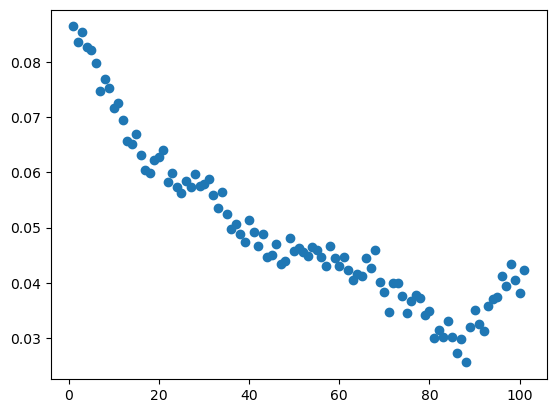

In [10]:
plt.scatter(frames, orders)

In [6]:
orders = []
frames = []
for frame in traj:
    count += 1
    frames.append(count)
    positions = frame.particles.position
    nematic.compute(positions)
    orders.append(nematic.order)
    

Text(0, 0.5, 'S2 parameter')

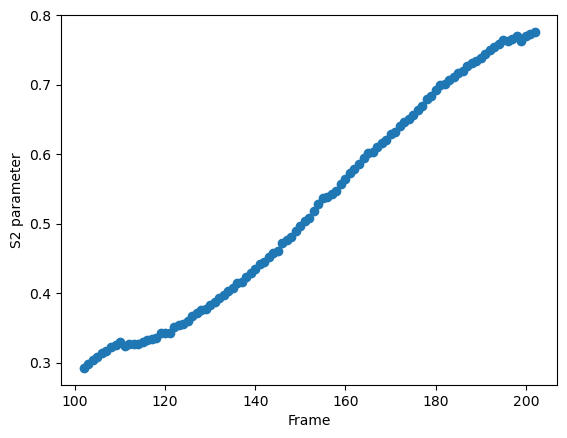

In [7]:
plt.scatter(frames, orders)
plt.xlabel("Frame")
plt.ylabel("S2 parameter")